<h1>Ensemble Methods</h1>

* Ensemble Learning helps improve machine learning results by combining several models.
* We can use these techniques for regression as well as classification problems.
* The final prediction from these ensembling techniques is obtained by combining results from several base models.
* Averaging, voting and stacking are some of the ways the results are combined to obtain a final prediction

<h2>Types of Ensemble Learning</h2>

* Bagging
* Boosting

<h3>Bagging</h3>

* Each model is trained on a different random subset of the training data, generated by sampling with the replacement.
* The Prediction are combined by averaging for regression or by majority voting for classification

* Example: Random Forest


<h3>Boosting</h3>

* Models are trained sequentially, each focusing on correcting the errors of the previous model.
* The predictions are combined by weighted voting for classification or weighted averaging for regression. 
* Example: AdaBoost


<h3>Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

<h3>Random Forest</h3>

In [2]:
df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<h3>Split X and Y</h3>

In [10]:
x=df.drop(columns=['DEATH_EVENT'])
y=df['DEATH_EVENT']

In [11]:
print(X.shape)
print(y.shape)

(299, 12)
(299,)


<h3>Split into Train and Test</h3>

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

<h3>Model Fitting</h3>

In [13]:
rf = RandomForestClassifier()

In [14]:
rf.fit(x_train, y_train)

RandomForestClassifier()

<h3>Predict on test data</h3>

In [15]:
y_pred = rf.predict(x_test)
print(y_pred)

[1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1]


<h3>Evaluation Metrices</h3>

In [19]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report


In [20]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test))
print("Precision-Score :",precision_score(y_pred,y_test))
print("F1-Score :",f1_score(y_pred,y_test))

Model's acuracy : 0.85
Recall-Score : 0.7222222222222222
Precision-Score : 0.7647058823529411
F1-Score : 0.7428571428571429


<h3>Confusion Metrics</h3>

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

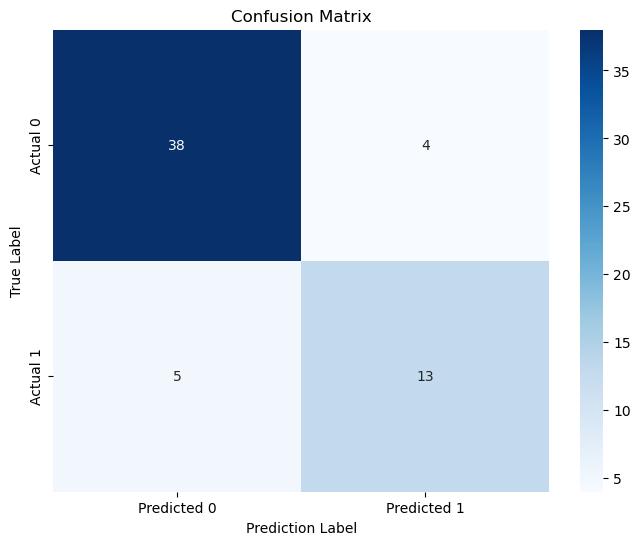

In [22]:
# Compute confusion matrix
cm = confusion_matrix(y_pred, y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Prediction Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<h3>AdaBoost Classifier</h3>

In [23]:
ab = AdaBoostClassifier()

In [24]:
ab.fit(x_train, y_train)

c:\Users\user\anaconda3\envs\primeai\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

<h3>Predict on Test data</h3>

In [25]:
#Testing on test datas
y_pred=ab.predict(x_test)

print(y_pred)

[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1]


<h3>Evaluation Metrics</h3>

In [26]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [27]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test))
print("Precision-Score :",precision_score(y_pred,y_test))
print("F1-Score :",f1_score(y_pred,y_test))

Model's acuracy : 0.7666666666666667
Recall-Score : 0.5714285714285714
Precision-Score : 0.7058823529411765
F1-Score : 0.631578947368421


<h3>Confusion Matrix</h3>

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

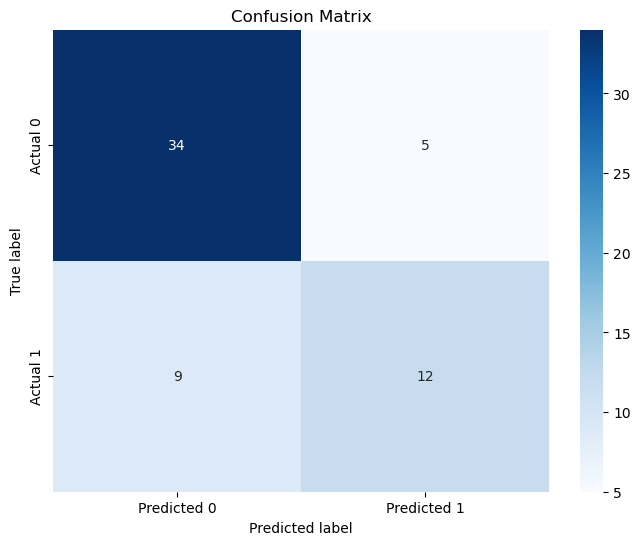

In [29]:

# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()